## Q3. DATASET: 2_customerspends.csv [Cluster Analysis]
## Srikant
## 19A1HP041

In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing to ignore the warnings
import pandas as pd # importing dataframe library
customers_df = pd.read_csv( "2_customerspends.csv" )#importing datset
customers_df= customers_df.drop('Customer', axis=1)# dropping the first col as it is just index
customers_df.head( 5 )# print fisrt 5 rows

,Apparel,Beauty and Healthcare
0,21.10,0.7
1,15.23,5.5
2,5.22,18.6
3,31.10,1.8
4,6.12,21.5


In [14]:
import numpy as np # # importing for mathematical operations
import matplotlib.pyplot as plt # importing visualisation library to plot graphs
import seaborn as sn ##importing seaborn to give us high-level interface
%matplotlib inline
#for printing inline

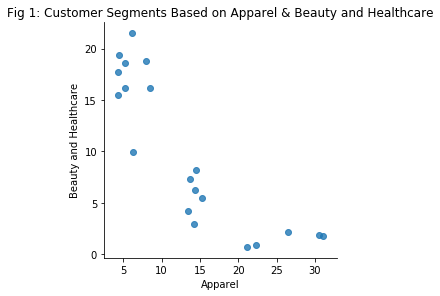

In [15]:
sn.lmplot( "Apparel", "Beauty and Healthcare", data=customers_df, fit_reg = False, size = 4 );
plt.title( "Fig 1: Customer Segments Based on Apparel & Beauty and Healthcare");
# print to see overall spread of points in datset
# 3 clusters identified

In [4]:
from sklearn.cluster import KMeans # help in measure classification performance
clusters = KMeans( 3 ) # taking intial cluster size as 3
clusters.fit( customers_df ) # fitting the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
customers_df["clusterid"] = clusters.labels_
customers_df[0:5]

,Apparel,Beauty and Healthcare,clusterid
0,21.10,0.7,1
1,15.23,5.5,2
2,5.22,18.6,0
3,31.10,1.8,1
4,6.12,21.5,0


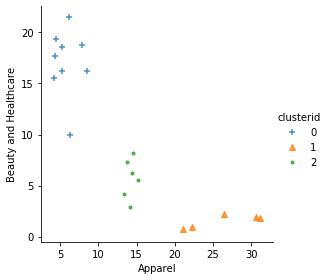

In [6]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",data=customers_df,hue = "clusterid",fit_reg=False,markers = markers,size = 4 );
#giving markers to each cluster and plotting

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["Apparel", "Beauty and Healthcare"]] )
scaled_customers_df[0:5]

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

In [18]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=41 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_
#normalising the clusters

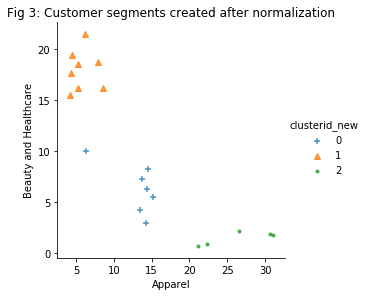

In [19]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",data=customers_df,hue = "clusterid_new",fit_reg=False,markers = markers,size = 4 );
plt.title( "Fig 3: Customer segments created after normalization");
#plotting after normalisation

In [10]:
clusters.cluster_centers_

array([[ 5.79777778, 17.09777778],
       [26.32      ,  1.5       ],
       [14.24666667,  5.73      ]])

In [12]:
customers_df.groupby( 'clusterid' )['Apparel','Beauty and Healthcare'].agg( ["mean",'std'] ).reset_index()

clusterid    Apparel           Beauty and Healthcare          
                  mean       std                  mean       std
0         0   5.797778  1.549006             17.097778  3.260068
1         1  26.320000  4.599130              1.500000  0.659545
2         2  14.246667  0.635662              5.730000  1.963212

In [20]:
## plotting dendogram

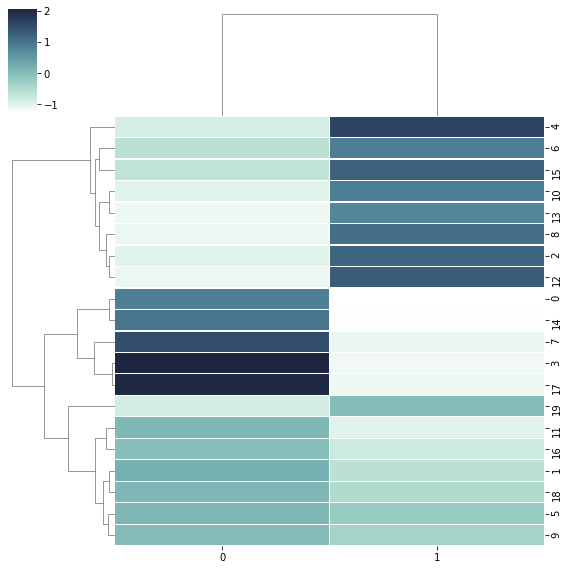

In [21]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_customers_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram");

In [ ]:
# seeing the dendo gram the clusters are coming to 2
#but since it is even number we will take 3

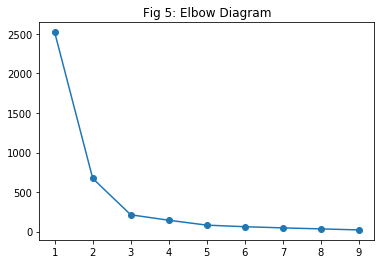

In [23]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( customers_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig 5: Elbow Diagram");

In [24]:
# even elbow diagram is giving clusters as two
# so we get the same clusters as before

In [25]:
k = 3
clusters = KMeans( k, random_state = 41 )
clusters.fit( scaled_customers_df )
customers_df["clusterid"] = clusters.labels_

In [26]:
customers_df[customers_df.clusterid == 0]

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
1,15.23,5.50,0,0
5,14.50,8.20,0,0
9,13.75,7.30,0,0
11,14.20,2.90,0,0
16,13.40,4.20,0,0
18,14.40,6.28,0,0
19,6.25,9.98,0,0


In [27]:
# Interpreting the Clusters
#Cluster 0 (high sepends on apparel and medium spends on beauty)

In [28]:
customers_df[customers_df.clusterid == 1]

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
2,5.22,18.6,1,1
4,6.12,21.5,1,1
6,8.50,16.2,1,1
8,4.34,17.7,1,1
10,5.20,16.2,1,1
12,4.40,19.4,1,1
13,4.25,15.5,1,1
15,7.90,18.8,1,1


In [29]:
#Cluster 1 (low sepends on apparel and high spends on beauty)

In [30]:
customers_df[customers_df.clusterid == 2]

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
0,21.1,0.7,2,2
3,31.1,1.8,2,2
7,26.5,2.2,2,2
14,22.3,0.9,2,2
17,30.6,1.9,2,2


In [ ]:
#Cluster 2 (high sepends on apparel and low spends on beauty)